# Homework 3
Total 120 points.

In [11]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


The next cell loads a table containing information about every earthquake with a magnitude above 5 in 2019 (smaller earthquakes are generally not felt, only recorded by very sensitive equipment), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)


In [12]:
earthquakes = Table().read_table('https://raw.githubusercontent.com/yu-to-chen/data-science/master/assets/data/earthquakes_2019.csv').select(['time', 'mag', 'place'])
earthquakes



time,mag,place
2019-12-31T11:22:49.734Z,5,"245km S of L'Esperance Rock, New Zealand"
2019-12-30T17:49:59.468Z,5,"37km NNW of Idgah, Pakistan"
2019-12-30T17:18:57.350Z,5.5,"34km NW of Idgah, Pakistan"
2019-12-30T13:49:45.227Z,5.4,"33km NE of Bandar 'Abbas, Iran"
2019-12-30T04:11:09.987Z,5.2,"103km NE of Chichi-shima, Japan"
2019-12-29T18:24:41.656Z,5.2,Southwest of Africa
2019-12-29T13:59:02.410Z,5.1,"138km SSW of Kokopo, Papua New Guinea"
2019-12-29T09:12:15.010Z,5.2,"79km S of Sarangani, Philippines"
2019-12-29T01:06:00.130Z,5,"9km S of Indios, Puerto Rico"
2019-12-28T22:49:15.959Z,5.2,"128km SSE of Raoul Island, New Zealand"


In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes.

In [13]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(100))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]


[6.4589999999999987, 5.2790000000000008]

# Question 1. 
(20 points)
- Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)?

- Hint: Consider the ordering of the earthquakes table.


## Ans: 
No, We shouldn't expect these two means are close to the population mean. 
Because these two samples are not randomly selected. The sample1 is ordered by magnitude, and the sample2 is ordered by time.

# Question 2. 
(20 points)
- Write code to produce a sample of size 200 that is representative of the population. Then, take the mean of the magnitudes of the earthquakes in this sample. Assign these to representative_sample and representative_mean respectively.
- Hint: In class, we learned what kind of samples should be used to properly represent the population.

In [14]:
sample_200 = earthquakes.sample(200, with_replacement = False)
representative_sample = sample_200.sample(200, with_replacement = True)
representative_mean = np.mean(representative_sample.column('mag'))

# Question 3. 
(20 points)
- Suppose we want to figure out what the biggest magnitude earthquake was in 2019, but we only have our representative sample of 200. Let’s see if trying to find the biggest magnitude in the population from a random sample of 200 is a reasonable idea!
- Write code that takes many random samples from the earthquakes table and finds the maximum of each sample. You should take a random sample of size 200 and do this 5000 times. Assign the array of maximum magnitudes you find to maximums.

In [33]:
maximums = make_array()
from random import sample

def one_simulated_result():
  sample_200 = earthquakes.sample(200, with_replacement = False)
  new_sample = sample_200.sample(200, with_replacement = True)
  sample_max = np.max(new_sample.column('mag'))
  return sample_max

for i in np.arange(5000):
  max = one_simulated_result()
  maximums = np.append(maximums, max)


# Question 4. 
(20 points)
- Run the following code to plot its histogram.

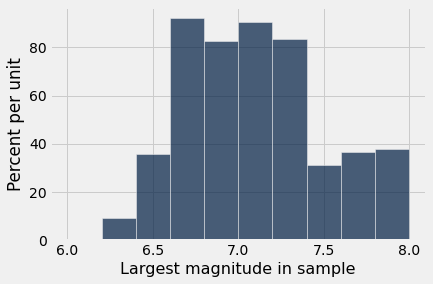

In [34]:
# Histogram of your maximums
Table().with_column('Largest magnitude in sample', maximums).hist('Largest magnitude in sample')



# Question 5. 
(20 points)
- Now find the magnitude of the actual strongest earthquake in 2019 (not the maximum of a sample). 
- This will help us determine whether a random sample of size 200 is likely to help you determine the largest magnitude earthquake in the population.

In [36]:
earthquakes.column('mag').max()

8.0

# Question 6. 
(20 points)
- Explain whether you believe you can accurately use a sample size of 200 to determine the maximum. 
- What is one problem with using the maximum as your estimator? Use the histogram above to help answer.

## Ans:
No, I don't think the sample can accurately determine the maximum in the population. As the histogram shows, the maximum of samples have little probability is same as the maximum of population. Maximum of samples is either equal or below to the maximum of population.